In [1]:
"""문제1. Tokenization

1-1. Okt를 이용하여 'sample_corpus_hangul.txt' corpus를 불러와 형태 단위로 토큰화 하시오.
1-2. 토큰 전체 개수 구하기

Hint:
- from konlpy.tag import Okt
- 불필요한 공백 및 개행문자 제거: strip()
- list, set, dictinary, 문자열 개수 구하기: len()

"""

from konlpy.tag import Okt

with open('sample_corpus_hangul.txt', encoding='utf-8') as f:
    corpus = [line.strip() for line in f.readlines()]
    corpus = ' '.join(corpus)

okt = Okt()
tokens = okt.morphs(corpus)
print(tokens)
print(len(tokens))

['나랏말', '이', '중국', '과', '달라', '한자', '와', '서로', '통', '하지', '아니하므로', '우매', '한', '백성', '들', '이', '말', '하고', '싶은', '것', '이', '있어도', '마침내', '제', '뜻', '을', '잘', '표현', '하지', '못', '하는', '사람', '이', '많다', '.', '내', '이를', '딱하게', '여기어', '새로', '스물', '여덟', '자를', '만들었으니', '사람', '들', '로', '하여금', '쉬', '익히어', '날', '마다', '쓰는', '데', '편하게', '할', '뿐', '이다']
58


In [2]:
"""문제2. TF_IDF
'sample_corpus.txt' corpus를 line by line으로 불러와, TF_IDF text mining 하시오.
text mining 결과는 pandas DataFrame 으로 생성  
- 분석단위: 'word'
- 토큰 최대 개수: 5

Hint:
- from sklearn.feature_extraction.text import TfidfVectorizer
- import pandas as pd


"""

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

with open('sample_corpus.txt', encoding='utf-8') as f:
    corpus = [line.strip() for line in f.readlines()]

tfidf_vect = TfidfVectorizer(analyzer='word',
                             max_features=5)

dtm = tfidf_vect.fit_transform(corpus)
vocab = tfidf_vect.get_feature_names_out()
df_tfidf = pd.DataFrame(dtm.toarray(), columns=vocab)
df_tfidf


문의입니다        버스       승강장       지하철       코로나
0  0.326550  0.000000  0.000000  0.000000  0.945180
1  0.285703  0.000000  0.000000  0.958318  0.000000
2  0.388500  0.000000  0.651563  0.651563  0.000000
3  0.568471  0.000000  0.000000  0.000000  0.822704
4  0.512131  0.858908  0.000000  0.000000  0.000000
5  0.000000  1.000000  0.000000  0.000000  0.000000
6  0.000000  0.000000  0.000000  0.000000  1.000000
7  0.512131  0.000000  0.858908  0.000000  0.000000

In [3]:
"""문제3. Tokenization and DataFrame

Tab 으로 구분된 '영화감상평' 텍스트 파일 'ratings_train.txt'를 pandas DataFrame으로 불러와 토큰화하시오. (최종 결과는 DataFrame 일 것)
- 마지막 100개 row만 사용
- 토큰화 객체는 Okt를 사용
- 토큰은 명사(Noun)만 추출
- 토큰 결과는 DataFrame 에 'embedding' column에 생성할 것

Hint:
- Okt.pos()

"""

df = pd.read_table('ratings_train.txt')[-100:]

def tokenizer(okt: Okt, text:str)->list:
    return [token for token, pos in okt.pos(text) if pos=='Noun']
    
df['token'] = df['document'].apply(lambda x: tokenizer(okt, x))
df

id                                           document  label  \
149900   9392240  진짜엄청재미없다 무서운장면은 딱한번나오고 그3초말고는 하나도안무섭고 지루하고 끝나고...      0   
149901  10141935  너무 짜증나서, 끝은봐야해서 2배속빨리보기했다. 안본사람 호기심이라도 같지말길. 가...      0   
149902   9641183                                설명은 줄이고 조율이 필요한 영화.      0   
149903  10276386            이야~~~40만 넘었내..베테랑은 9백만 넘었는데...나 협심증 걸렸다      0   
149904   4403898                        전형적인 유치뽕짝 프랑스영화 새로운장르다 유치뽕짝      0   
...          ...                                                ...    ...   
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0   
149996   8549745                                      평점이 너무 낮아서...      1   
149997   9311800                    이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?      0   
149998   2376369                        청춘 영화의 최고봉.방황과 우울했던 날들의 자화상      1   
149999   9619869                           한국 영화 최초로 수간하는 내용이 담긴 영화      0   

                                     token  
149900         [진짜, 장면, 한번, 그, 하나, 귀신, 햇던]  
149901  [끝, 배속, 보기, 안, 사람, 호기심, 가치, 강비, 추]  
149902                     [설명, 줄, 조율, 영화]  
149903                    [베테, 백만, 나, 협심증]  
149904   [전형, 유치, 뽕짝, 프랑스, 영화, 장르, 유치, 뽕짝]  
...                                    ...  
149995                     [인간, 문제, 소, 죄인]  
149996                                [평점]  
149997           [이, 뭐, 한국인, 먹거리, 필리핀, 혼혈]  
149998           [청춘, 영화, 최고봉, 방황, 날, 자화상]  
149999            [한국, 영화, 최초, 수간, 내용, 영화]  

[100 rows x 4 columns]

In [4]:

"""문제4. embedding
문제3 에서 생성된 token을 이용하여 sentence embedding 생성하시오.
- pandas DataFrame에 'embedding' column 에 embedding 값 생성
- Word2Vec 객체 사용
    벡터 크기: 10
    최소 빈도수: 1
    윈도우 5
    skip gram : 사용

Hint:
- from gensim.models import Word2Vec
- import numpy as np
"""

from gensim.models import Word2Vec
import numpy as np

# set params
vector_size = 10

# instantiate a model
model = Word2Vec(
    sentences=df['token'],
    vector_size = vector_size,
    min_count=1,
    window = 5,
    sg=1
)

# empty list for a list of embeddings
embedding_list = []

# iterate
for tokens in df['token']:
    if len(tokens) != 0:
        token_vec = [model.wv[token] for token in tokens]
        token_arr = np.array(token_vec)
        embedding = np.mean(token_arr, axis=0)
    else:
        embedding = np.zeros((vector_size,))    
  
    embedding_list.append(embedding)
    
df['embedding'] = embedding_list
df

id                                           document  label  \
149900   9392240  진짜엄청재미없다 무서운장면은 딱한번나오고 그3초말고는 하나도안무섭고 지루하고 끝나고...      0   
149901  10141935  너무 짜증나서, 끝은봐야해서 2배속빨리보기했다. 안본사람 호기심이라도 같지말길. 가...      0   
149902   9641183                                설명은 줄이고 조율이 필요한 영화.      0   
149903  10276386            이야~~~40만 넘었내..베테랑은 9백만 넘었는데...나 협심증 걸렸다      0   
149904   4403898                        전형적인 유치뽕짝 프랑스영화 새로운장르다 유치뽕짝      0   
...          ...                                                ...    ...   
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0   
149996   8549745                                      평점이 너무 낮아서...      1   
149997   9311800                    이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?      0   
149998   2376369                        청춘 영화의 최고봉.방황과 우울했던 날들의 자화상      1   
149999   9619869                           한국 영화 최초로 수간하는 내용이 담긴 영화      0   

                                     token  \
149900         [진짜, 장면, 한번, 그, 하나, 귀신, 햇던]   
149901  [끝, 배속, 보기, 안, 사람, 호기심, 가치, 강비, 추]   
149902                     [설명, 줄, 조율, 영화]   
149903                    [베테, 백만, 나, 협심증]   
149904   [전형, 유치, 뽕짝, 프랑스, 영화, 장르, 유치, 뽕짝]   
...                                    ...   
149995                     [인간, 문제, 소, 죄인]   
149996                                [평점]   
149997           [이, 뭐, 한국인, 먹거리, 필리핀, 혼혈]   
149998           [청춘, 영화, 최고봉, 방황, 날, 자화상]   
149999            [한국, 영화, 최초, 수간, 내용, 영화]   

                                                embedding  
149900  [0.031782478, 0.0035474768, 0.026717216, 0.011...  
149901  [0.015207033, -0.021548737, 0.032968495, 0.042...  
149902  [0.054790534, -0.0028638262, -0.0035148906, 0....  
149903  [-0.061797038, -0.029410193, 0.060724102, -0.0...  
149904  [-0.024952425, 0.038360678, 0.037586156, 0.007...  
...                                                   ...  
149995  [0.031457767, -0.037061013, -0.029810324, 0.02...  
149996  [-0.072861925, -0.01454594, 0.102436885, -0.07...  
149997  [0.00662999, -0.02685444, -0.021847392, -0.034...  
149998  [-0.031007819, -0.02778984, 0.012129188, 0.046...  
149999  [-0.026191534, 0.011701822, 0.05798911, 0.0478...  

[100 rows x 5 columns]

In [11]:
"""문제5. Python Types
문5.1

a = 'Hello World' 를 이용하여 아래의 결과를 출력하는 Python code를 작성하시오.

['H', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd', ' ', '2', '0', '2', 'Hello there']

문5.2

d1 = {'David':25, 'Nami': 20, 'John':28} # key: value
d2 = {'Johnson':21, 'Ethan':30}

{'David': 25, 'Nami': 20, 'John': 28, 'Johnson': 21, 'Ethan': 30}

""" 

a = 'Hellow World'
a = list(a)

for i in [' ', '2', '0', '2', 'Hello there']:
    a.append(i)
print(a)

d1 = {'David':25, 'Nami': 20, 'John':28} # key: value
d2 = {'Johnson':21, 'Ethan':30}

d3 = d1 | d2
d3

['H', 'e', 'l', 'l', 'o', 'w', ' ', 'W', 'o', 'r', 'l', 'd', ' ', '2', '0', '2', 'Hello there']


{'David': 25, 'Nami': 20, 'John': 28, 'Johnson': 21, 'Ethan': 30}

In [6]:
"""문제6. 벡터 연산

2,4,6,8,10 각각의 숫자에 2를 곱하여 그 결과를 출력하는 벡터 연산을 python code로 작성하시오.

Hint:
- numpy

"""
import numpy as  np

a = list([2,4,6,8,10])
a = np.array(a) * 2
a


array([ 4,  8, 12, 16, 20])

In [7]:
"""문제7. Pandas
문제7.1 아래 DataFrame을 출력하는 python code을 작성하시오.

	category	Name	Age	Income
0	A	        John	28	50000
1	B	        Anna	34	60000
2	A	        Perter	45	80000
3	B	        Linda	32	75000

문제7.1
위 DataFrame 을 이용하여 category별로 평균 나이(Age)와 수입(Income) 을 계산하는 Python code를 작성하시오.
(평균은 산술평균으로 구할 것.)
"""

data = {
    'category':['A','B','A','B'],
    'Name': ['John', 'Anna', 'Perter', 'Linda'],
    'Age':[28,34,45,32],
    'Income': [50000, 60000, 80000, 75000]
}

df = pd.DataFrame(data)
print(df)

df_grouped = df.drop('Name', axis=1).groupby('category').mean()
df_grouped

  category    Name  Age  Income
0        A    John   28   50000
1        B    Anna   34   60000
2        A  Perter   45   80000
3        B   Linda   32   75000


Age   Income
category               
A         36.5  65000.0
B         33.0  67500.0

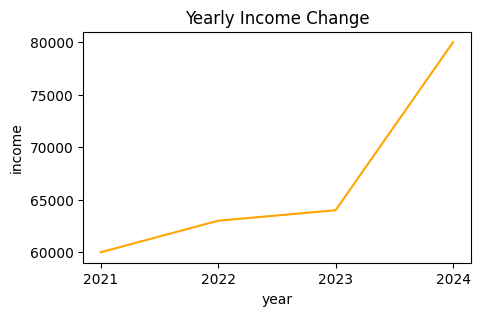

In [8]:
"""문제8. Matplotlib
문제7.1의 John의 연간 수입의 변화를 표현하는 꺽은선 그래프를 그리시오.

year    income
2021    60000
2022    63000
2023    64000
2024    80000

(그래프에는 다음의 세부 사항을 표시할 것)
- 가로세로 크기 (5,3)
- x축 제목: year
- y축 제목: income
- 그래프 제목: Yearly Income Change
- 꺽은선 색상: 오렌지

Hint:
- import matplotlib.pyplot as plt

"""

import matplotlib.pyplot as plt

data = {
    'year': ['2021','2022','2023','2024'],
    'income': [60000, 63000, 64000, 80000]
}

df = pd.DataFrame(data)

plt.figure(figsize=(5,3))
plt.plot(data['year'], data['income'], c='orange')
plt.xlabel('year')
plt.ylabel('income')
plt.title('Yearly Income Change')
plt.show()